<a href="https://colab.research.google.com/github/kkimhaji/FlyAI/blob/main/Deep%20Learning/Augmentation/18_bin_classification_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 증감

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

## 데이터 준비

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-01-10 09:53:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  16.1MB/s    in 5.7s    

2023-01-10 09:53:36 (11.5 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!unzip 'cats_and_dogs_filtered'

In [4]:
data_root = '/content/cats_and_dogs_filtered'

In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
img = image.load_img('/content/cats_and_dogs_filtered/train/cats/cat.10.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

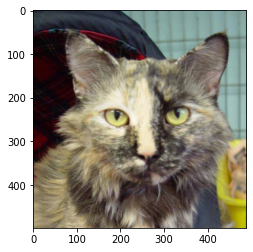

In [ ]:
plt.imshow(img)
plt.show()

In [50]:
x = image.img_to_array(img)
print(x.shape)
print(type(x))
print(x.dtype)

(499, 489, 3)
<class 'numpy.ndarray'>
float32


In [52]:
x = x.astype('int').reshape(1, 499, 489, 3)
x.shape

(1, 499, 489, 3)

In [53]:
gen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    vertical_flip = True,
    horizontal_flip = True
) # 이 중에서 랜덤으로 적용됨

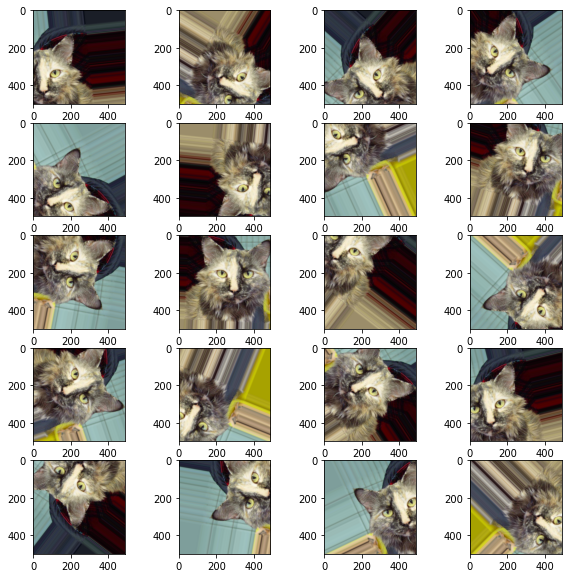

<Figure size 720x720 with 0 Axes>

In [54]:
train_idx = 0
idx = 0
axs = []
fig = plt.figure(figsize=(10, 10))
plt.figure(figsize=(10, 10))
for batch in gen.flow(x, batch_size=1):
    axs.append(fig.add_subplot(5, 4, (idx+1)))
    axs[idx].imshow(image.array_to_img(batch[0]))
    idx = idx + 1
    if idx%20 == 0:
        break
plt.show()

In [6]:
import os
train_dir = os.path.join(data_root, 'train')
val_dir = os.path.join(data_root, 'validation')

In [9]:
train_gen = ImageDataGenerator(
  rescale = 1./255.,
  rotation_range = 90,
  width_shift_range = 0.4,
  height_shift_range = 0.4,
  vertical_flip = True,
  horizontal_flip = True
)
val_gen = ImageDataGenerator(rescale = 1./255.)

In [10]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

train_iter = train_gen.flow_from_directory(
  train_dir,
  batch_size = BATCH_SIZE,
  target_size = IMAGE_SIZE,
  class_mode = 'binary'
)

type(train_iter)


Found 2000 images belonging to 2 classes.


keras.preprocessing.image.DirectoryIterator

In [11]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

val_iter = val_gen.flow_from_directory(
  val_dir,
  batch_size = BATCH_SIZE,
  target_size = IMAGE_SIZE,
  class_mode = 'binary'
)

type(train_iter)


Found 1000 images belonging to 2 classes.


keras.preprocessing.image.DirectoryIterator

In [12]:
images, labels = train_iter.next()
len(images), len(labels)

(32, 32)

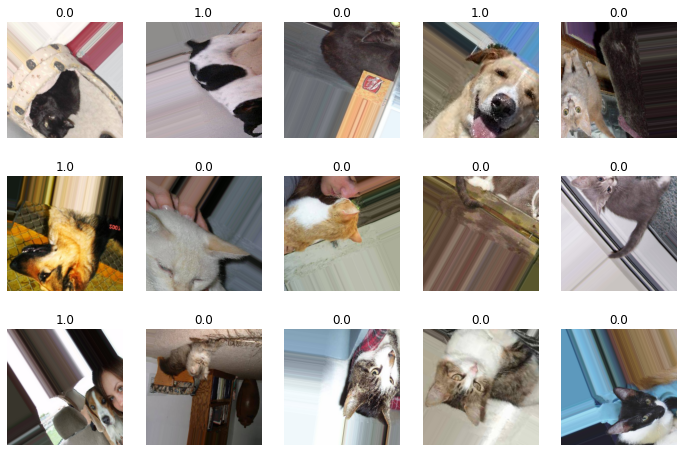

In [13]:
plt.figure(figsize = (12, 8))

for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.axis('off')
  plt.imshow(images[i])

  plt.title(labels[i])
plt.show()

In [15]:
def build_model():
  model = keras.Sequential([
      layers.Conv2D(filters = 32, kernel_size = 3,
                    activation='relu', padding = 'same', input_shape = (224, 224, 3)),
      layers.MaxPool2D(2),  
      layers.Conv2D(filters = 64, kernel_size = 3,padding = 'same',
                    activation='relu'),
      layers.MaxPool2D(2),
      layers.Conv2D(filters = 128, kernel_size = 3,padding = 'same',
                    activation='relu'),
      layers.MaxPool2D(2),
      layers.Conv2D(filters = 128, kernel_size = 3,padding = 'same',
                    activation='relu'),
      layers.MaxPool2D(2),
      layers.Flatten(),
      layers.Dropout(0.3),

      layers.Dense(256, activation='relu'),
      layers.Dense(1, activation='sigmoid') 
      
  ])

  model.compile(optimizer = 'adam', loss='binary_crossentropy', 
                metrics=['acc'])
  
  return model

In [16]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [17]:
EPOCHS = 3

log = model.fit(train_iter, epochs = EPOCHS, validation_data = val_iter,
                verbose = 1)

Epoch 1/30


ValueError: ignored

In [26]:
train_gen = ImageDataGenerator(
  rescale = 1./255,
  rotation_range = 90,
  width_shift_range = 0.4,
  height_shift_range = 0.4,
  vertical_flip = True,
  horizontal_flip = True,
  validation_split = 0.2
)
test_gen = ImageDataGenerator(rescale = 1./255.)

In [27]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

train_iter = train_gen.flow_from_directory(
  train_dir,
  batch_size = BATCH_SIZE,
  target_size = IMAGE_SIZE,
  class_mode = 'binary',
  subset = 'training'
)

Found 1600 images belonging to 2 classes.


In [28]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

val_iter = train_gen.flow_from_directory(
  train_dir,
  batch_size = BATCH_SIZE,
  target_size = IMAGE_SIZE,
  class_mode = 'binary',
  subset = 'validation'
)


Found 400 images belonging to 2 classes.


In [34]:
test_iter = test_gen.flow_from_directory(
  val_dir,
  batch_size = BATCH_SIZE,
  target_size = IMAGE_SIZE,
  class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [29]:
def build_model_2():
  model = keras.Sequential([
      layers.Conv2D(filters = 32, kernel_size = 3,
                    activation='relu', input_shape = (224, 224, 3)),
      layers.MaxPool2D(2),  
      layers.Conv2D(filters = 64, kernel_size = 3,
                    activation='relu'),
      layers.MaxPool2D(2),
      layers.Conv2D(filters = 128, kernel_size = 3,
                    activation='relu'),
      layers.MaxPool2D(2),
      layers.Flatten(),

      layers.Dense(256, activation='relu'),
      layers.Dense(1, activation='sigmoid') 
      
  ])

  model.compile(optimizer = 'adam', loss='binary_crossentropy', 
                metrics=['acc'])
  
  return model

In [30]:
model = build_model_2()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 128)     

In [31]:
from tensorflow.keras import callbacks
#콜백

ckpt_path = './tmp/cat_dogs_ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor= 'val_loss',
    save_weights_only = True,
    save_best_only = True,
    verbose=1,
)

In [32]:
EPOCHS = 3

log = model.fit(train_iter, epochs = EPOCHS, validation_data = val_iter,
                callbacks = [ckpt_callback])



Epoch 1/3
50/50 [==============================] - ETA: 0s - loss: 0.8023 - acc: 0.4906
Epoch 1: val_loss improved from inf to 0.69066, saving model to ./tmp/cat_dogs_ckpt
50/50 [==============================] - 36s 528ms/step - loss: 0.8023 - acc: 0.4906 - val_loss: 0.6907 - val_acc: 0.5025
Epoch 2/3
50/50 [==============================] - ETA: 0s - loss: 0.6860 - acc: 0.5269
Epoch 2: val_loss improved from 0.69066 to 0.68796, saving model to ./tmp/cat_dogs_ckpt
50/50 [==============================] - 26s 516ms/step - loss: 0.6860 - acc: 0.5269 - val_loss: 0.6880 - val_acc: 0.5225
Epoch 3/3
50/50 [==============================] - ETA: 0s - loss: 0.6754 - acc: 0.5575
Epoch 3: val_loss improved from 0.68796 to 0.67180, saving model to ./tmp/cat_dogs_ckpt
50/50 [==============================] - 26s 517ms/step - loss: 0.6754 - acc: 0.5575 - val_loss: 0.6718 - val_acc: 0.5450


In [ ]:
model.load_weights(ckpt_path) #를 해야 모델의 best 상태로 업데이트 시켜줌

In [33]:
model.evaluate(train_iter)

50/50 [==============================] - 22s 432ms/step - loss: 0.6833 - acc: 0.5269


[0.6832643151283264, 0.5268750190734863]

In [35]:
model.evaluate(test_iter)

32/32 [==============================] - 4s 115ms/step - loss: 0.6769 - acc: 0.5270


[0.6768947839736938, 0.5270000100135803]